In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv('new_data.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83561 entries, 0 to 83560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            83561 non-null  int64  
 1   type            83561 non-null  object 
 2   amount          83561 non-null  float64
 3   nameOrig        83561 non-null  object 
 4   oldbalanceOrg   83560 non-null  float64
 5   newbalanceOrig  83560 non-null  float64
 6   nameDest        83560 non-null  object 
 7   oldbalanceDest  83560 non-null  float64
 8   newbalanceDest  83560 non-null  float64
 9   isFraud         83560 non-null  float64
 10  isFlaggedFraud  83560 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 7.0+ MB


In [6]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,83561.000000,8.356100e+04,8.356000e+04,8.356000e+04,8.356000e+04,8.356000e+04,83560.000000,83560.0
mean,8.204473,1.684883e+05,8.888170e+05,9.055016e+05,8.661407e+05,1.180913e+06,0.001340,0.0
std,1.859640,3.363563e+05,2.731026e+06,2.769537e+06,2.397540e+06,2.826509e+06,0.036587,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,9.550620e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,4.873624e+04,1.987300e+04,0.000000e+00,1.938916e+04,3.685593e+04,0.000000,0.0
75%,9.000000,2.056751e+05,1.795912e+05,2.019698e+05,5.561267e+05,1.019467e+06,0.000000,0.0
max,10.000000,1.000000e+07,3.379739e+07,3.400874e+07,3.130692e+07,3.197699e+07,1.000000,0.0


# Data Visualization

In [7]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 1
Float variables: 7


<Axes: xlabel='type', ylabel='count'>

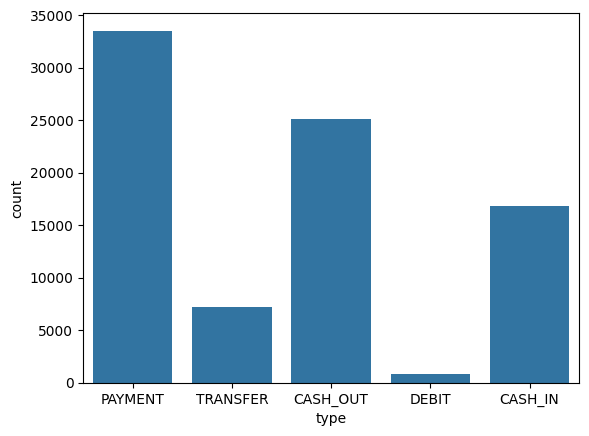

In [8]:
sns.countplot(x='type', data=data)


<Axes: xlabel='type', ylabel='amount'>

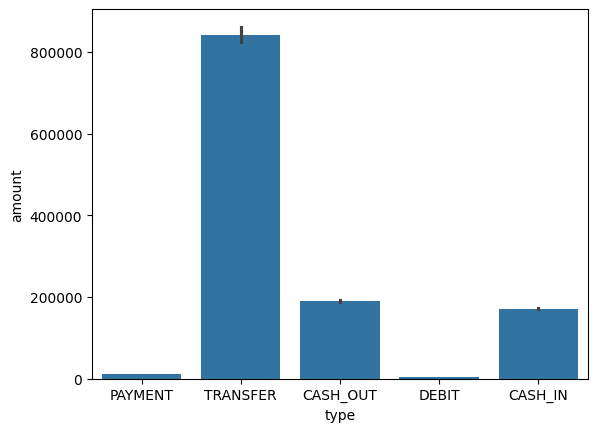

In [9]:
sns.barplot(x='type', y='amount', data=data)

In [10]:
data['isFraud'].value_counts()

,count
isFraud,
0.0,83448
1.0,112


<ipython-input-11-d1bba932735e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['step'], bins=50)


<Axes: xlabel='step', ylabel='Density'>

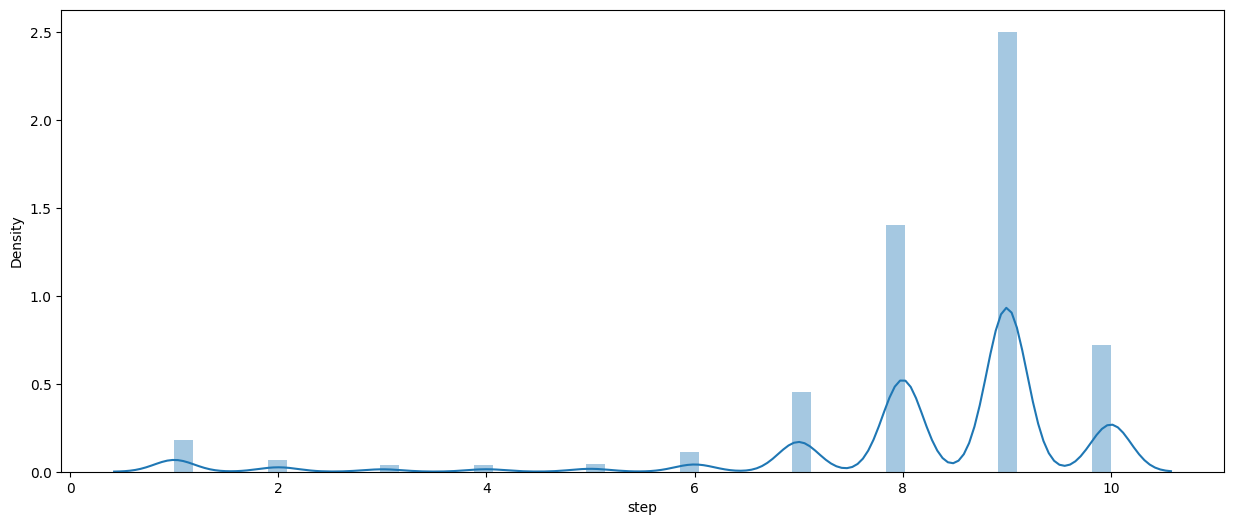

In [11]:
plt.figure(figsize=(15, 6))
sns.distplot(data['step'], bins=50)

<Axes: >

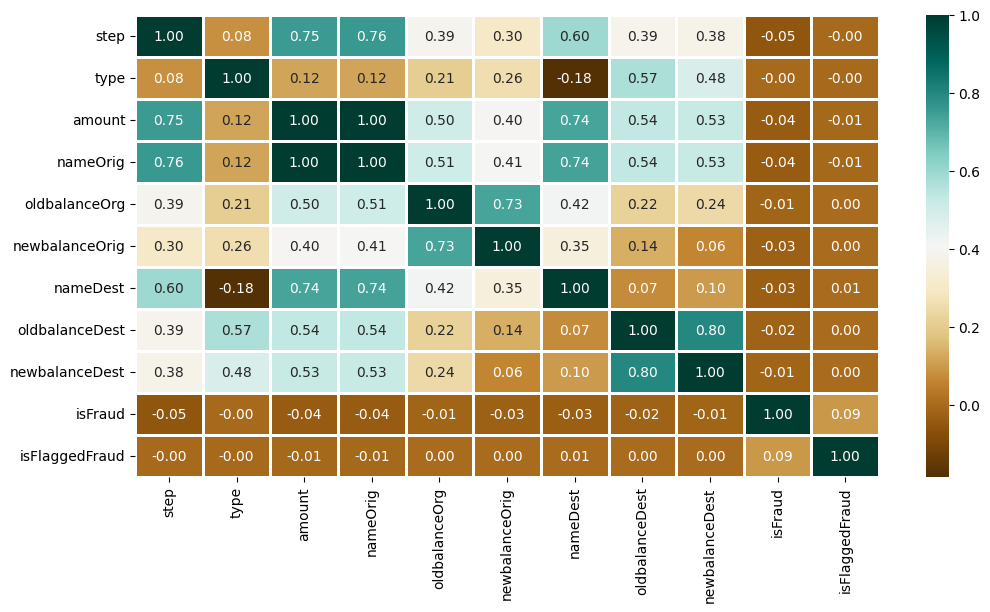

In [12]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.apply(lambda x: pd.factorize(x)[0]).corr(),
			cmap='BrBG',
			fmt='.2f',
			linewidths=2,
			annot=True)

# Data Preprocessing

Encoding of Type column & Dropping irrelevant columns like nameOrig, nameDest

In [20]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,False,False,True,False


Data Splitting

In [21]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']

In [22]:
X.shape, y.shape

((83561, 11), (83561,))

Train and test split

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd # Assuming pandas is already imported

# Drop rows where the target variable 'y' has NaN values
# Ensure the index is reset after dropping rows to maintain alignment
data_new.dropna(subset=['isFraud'], inplace=True)

# Re-define X and y after dropping rows with NaN in the target
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Initialize the imputer with a strategy (e.g., 'mean', 'median', 'most_frequent')
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
# It's important to fit on training data only and transform both to avoid data leakage
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Now X_train and X_test should not contain NaN values

# Model Training

In [29]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [32]:
models = [LogisticRegression(), XGBClassifier(),
          RandomForestClassifier(n_estimators=7,
                                 criterion='entropy',
                                 random_state=7)]

for i in range(len(models)):
    models[i].fit(X_train, y_train)
    print(f'{models[i]} : ')

    train_preds = models[i].predict_proba(X_train)[:, 1]
    print('Training Accuracy : ', ras(y_train, train_preds))

    y_preds = models[i].predict_proba(X_test)[:, 1]
    print('Validation Accuracy : ', ras(y_test, y_preds))
    print()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() : 
Training Accuracy :  0.9412475144184549
Validation Accuracy :  0.9222007275479951

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.99750825325399

RandomForestClassifier(criterion='entropy', n_estimators=7, random

# Model Evaluation

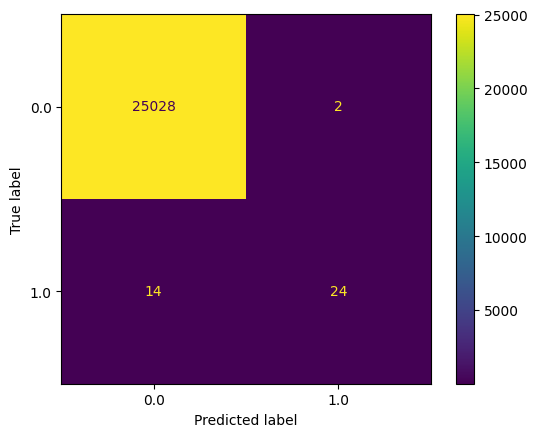

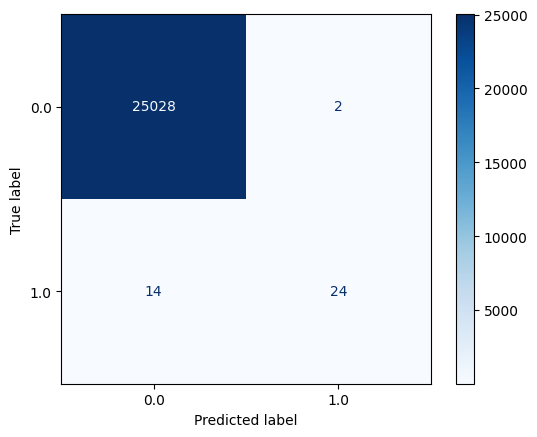

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = ConfusionMatrixDisplay.from_estimator(models[1], X_test, y_test)

cm.plot(cmap='Blues')

plt.show()

In [40]:
# prompt: u saw the dataset, i want to implement graph neural network. generate code for that

!pip install -q torch torch_geometric
import torch
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

# Given the current dataset is tabular, we need to create a graph representation.
# This is not straightforward and depends heavily on the underlying structure of the data.
# For demonstration purposes, we will create a simple graph where each row is a node
# and add edges randomly or based on some simple criteria.
# In a real scenario, you would need domain expertise to define meaningful nodes and edges.

# Let's assume each transaction is a node. We can add edges between transactions
# that involve the same `nameOrig` or `nameDest`.

# Create a mapping for unique names to node indices
unique_names = pd.concat([data['nameOrig'], data['nameDest']]).unique()
name_to_node_idx = {name: i for i, name in enumerate(unique_names)}

# Prepare node features. We can use the processed numerical features from the tabular data.
# Since the number of nodes will be the number of unique names, we need to aggregate features
# or assign features to the nodes based on the transactions they are involved in.
# A simple approach is to create initial node features for each unique name, maybe
# based on aggregated transaction data for that name. This is a simplification.

# Let's create initial node features based on the number of transactions each name is involved in.
# This is a very basic example of node features.
node_features = np.zeros((len(unique_names), 1))
name_counts = pd.concat([data['nameOrig'], data['nameDest']]).value_counts()
for name, count in name_counts.items():
    if name in name_to_node_idx:
        node_features[name_to_node_idx[name]] = count

x = torch.tensor(node_features, dtype=torch.float)

# Prepare edges. Add an edge between node i and node j if they are connected
# through a transaction (i.e., name_i is nameOrig and name_j is nameDest in a transaction).
edges = []
for index, row in data.iterrows():
    orig_node_idx = name_to_node_idx.get(row['nameOrig'])
    dest_node_idx = name_to_node_idx.get(row['nameDest'])
    if orig_node_idx is not None and dest_node_idx is not None:
        edges.append([orig_node_idx, dest_node_idx])
        # Depending on whether the graph is directed or undirected, you might add the reverse edge
        # edges.append([dest_node_idx, orig_node_idx]) # Uncomment for undirected graph

edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()

# Prepare labels for the nodes. This is tricky as the labels are on transactions.
# We need to associate a label with each unique name (node).
# A simple approach is to assign the label of the first transaction a name was involved in,
# or aggregate the labels. This is a significant simplification and might not be suitable
# for the fraud detection task at the node level.
# For this example, we will create a dummy label based on the number of transactions.
# In a real GNN for this problem, you might define different nodes (e.g., transactions, accounts)
# and edges and assign labels accordingly.

# Dummy node labels: 1 if a name is involved in more than 10 transactions, 0 otherwise.
# This is NOT the original fraud label and is for demonstration of graph creation only.
node_labels = np.zeros(len(unique_names))
for name, count in name_counts.items():
    if name in name_to_node_idx:
        if count > 10:
            node_labels[name_to_node_idx[name]] = 1

y_graph = torch.tensor(node_labels, dtype=torch.long)


# Create the PyTorch Geometric Data object
data_graph = Data(x=x, edge_index=edge_index, y=y_graph)

print(data_graph)


# Define a simple Graph Convolutional Network (GCN) model
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1) # Using log_softmax for classification

# Since we created dummy labels, we will train this GNN on the dummy node labels.
# This is NOT a model for the original fraud detection task.

# For a real fraud detection task using GNNs, you would need to carefully define
# the graph structure, node features, and edge features relevant to fraud.
# For example, nodes could be accounts, transactions, IPs, etc., and edges
# could represent transactions between accounts, shared IPs, etc.

# For demonstration purposes, let's train the dummy GNN model
# Determine input and output dimensions
num_node_features = data_graph.num_node_features
num_classes = data_graph.y.max().item() + 1 if data_graph.y.dim() > 0 else 1 # Handle case with no labels

model = GCN(in_channels=num_node_features, hidden_channels=16, out_channels=num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.NLLLoss() # Negative Log Likelihood Loss

# Simple train-test split for nodes
# In a real graph setting, you might use masked indices for training/validation/testing
# train_mask = torch.zeros(data_graph.num_nodes, dtype=torch.bool)
# train_mask[:int(0.8 * data_graph.num_nodes)] = True
# test_mask = ~train_mask

# Let's create a simple random split for demonstration
num_nodes = data_graph.num_nodes
train_size = int(0.8 * num_nodes)
indices = torch.randperm(num_nodes)
train_indices = indices[:train_size]
test_indices = indices[train_size:]

train_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)
train_mask[train_indices] = True
test_mask[test_indices] = True


model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data_graph)
    # Only calculate loss for training nodes
    loss = criterion(out[train_mask], data_graph.y[train_mask])
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f'Epoch: {epoch+1:03d}, Loss: {loss:.4f}')

model.eval()
out = model(data_graph)
# Evaluate on test nodes
pred = out[test_mask].argmax(dim=1)
correct = (pred == data_graph.y[test_mask]).sum()
acc = int(correct) / int(test_mask.sum())
print(f'Test Accuracy: {acc:.4f}')

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc

# Convert to numpy
true_labels = data_graph.y[test_mask].cpu().numpy()
pred_labels = pred.cpu().numpy()
prob_scores = out[test_mask][:, 1].exp().detach().cpu().numpy() if num_classes == 2 else None

# 1. Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)
print("\nConfusion Matrix:")
print(cm)

# 2. Classification Report
report = classification_report(true_labels, pred_labels, digits=4)
print("\nClassification Report:")
print(report)

# 3. ROC-AUC (only for binary classification)
if num_classes == 2:
    roc_auc = roc_auc_score(true_labels, prob_scores)
    precision, recall, _ = precision_recall_curve(true_labels, prob_scores)
    pr_auc = auc(recall, precision)
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    print(f"PR-AUC Score: {pr_auc:.4f}")


# Note: This GNN implementation and evaluation are based on the dummy graph and labels created.
# To apply GNNs effectively to your original fraud detection problem, you need to
# design a relevant graph structure and potentially use node/edge features derived
# from your dataset that capture relationships and patterns indicative of fraud.
# You might also need to adapt the loss function and evaluation metrics to the specific task
# (e.g., using ROC AUC if the task is binary classification at the node level).

Data(x=[127519, 1], edge_index=[2, 83561], y=[127519])
Epoch: 010, Loss: 0.3268
Epoch: 020, Loss: 0.1781
Epoch: 030, Loss: 0.1537
Epoch: 040, Loss: 0.1549
Epoch: 050, Loss: 0.1510
Epoch: 060, Loss: 0.1483
Epoch: 070, Loss: 0.1446
Epoch: 080, Loss: 0.1410
Epoch: 090, Loss: 0.1383
Epoch: 100, Loss: 0.1364
Epoch: 110, Loss: 0.1333
Epoch: 120, Loss: 0.1309
Epoch: 130, Loss: 0.1286
Epoch: 140, Loss: 0.1263
Epoch: 150, Loss: 0.1236
Epoch: 160, Loss: 0.1214
Epoch: 170, Loss: 0.1187
Epoch: 180, Loss: 0.1162
Epoch: 190, Loss: 0.1138
Epoch: 200, Loss: 0.1115
Test Accuracy: 0.9908

Confusion Matrix:
[[25270     0]
 [  234     0]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9908    1.0000    0.9954     25270
           1     0.0000    0.0000    0.0000       234

    accuracy                         0.9908     25504
   macro avg     0.4954    0.5000    0.4977     25504
weighted avg     0.9817    0.9908    0.9863     25504

ROC-AUC Score: 0.0000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


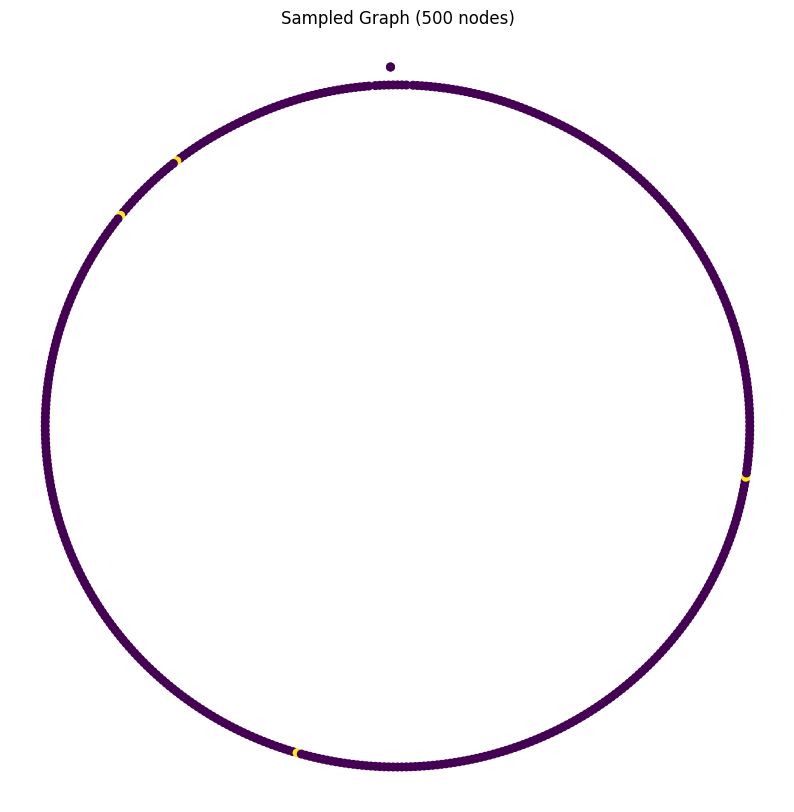

In [37]:
# prompt: i want to visualize the above graph neural network output  like edges and nodes

!pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt

# Create a NetworkX graph from the PyTorch Geometric data
# We assume the graph is undirected for visualization purposes.
# If it's directed, you might want to use nx.DiGraph() and adjust visualization.
G = nx.Graph()

# Add nodes
# Use the indices from the data_graph as node identifiers
G.add_nodes_from(range(data_graph.num_nodes))

# Add edges
# edge_index has shape [2, num_edges]. We need pairs of nodes for edges.
# The transpose (.t()) gives us [num_edges, 2], which is a list of node pairs.
edges_list = data_graph.edge_index.t().tolist()
G.add_edges_from(edges_list)

# Optional: Add node features or labels as attributes for visualization
# Here, we add the dummy labels
node_labels = data_graph.y.tolist()
for i, label in enumerate(node_labels):
    G.nodes[i]['label'] = label

# Visualize the graph
plt.figure(figsize=(10, 10))

# Choose a layout algorithm
# nx.spring_layout, nx.random_layout, nx.circular_layout, etc.
# For larger graphs, spring_layout can be slow.
pos = nx.spring_layout(G, seed=42) # for reproducibility

# Draw the nodes
# Color nodes based on the dummy label
node_colors = [G.nodes[i]['label'] for i in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=50, node_color=node_colors, cmap=plt.cm.viridis)

# Draw the edges
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5)

# Optional: Draw labels (can make the plot cluttered for many nodes)
# nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Visualization of the created Graph")
plt.axis('off') # Hide axes
plt.show()

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

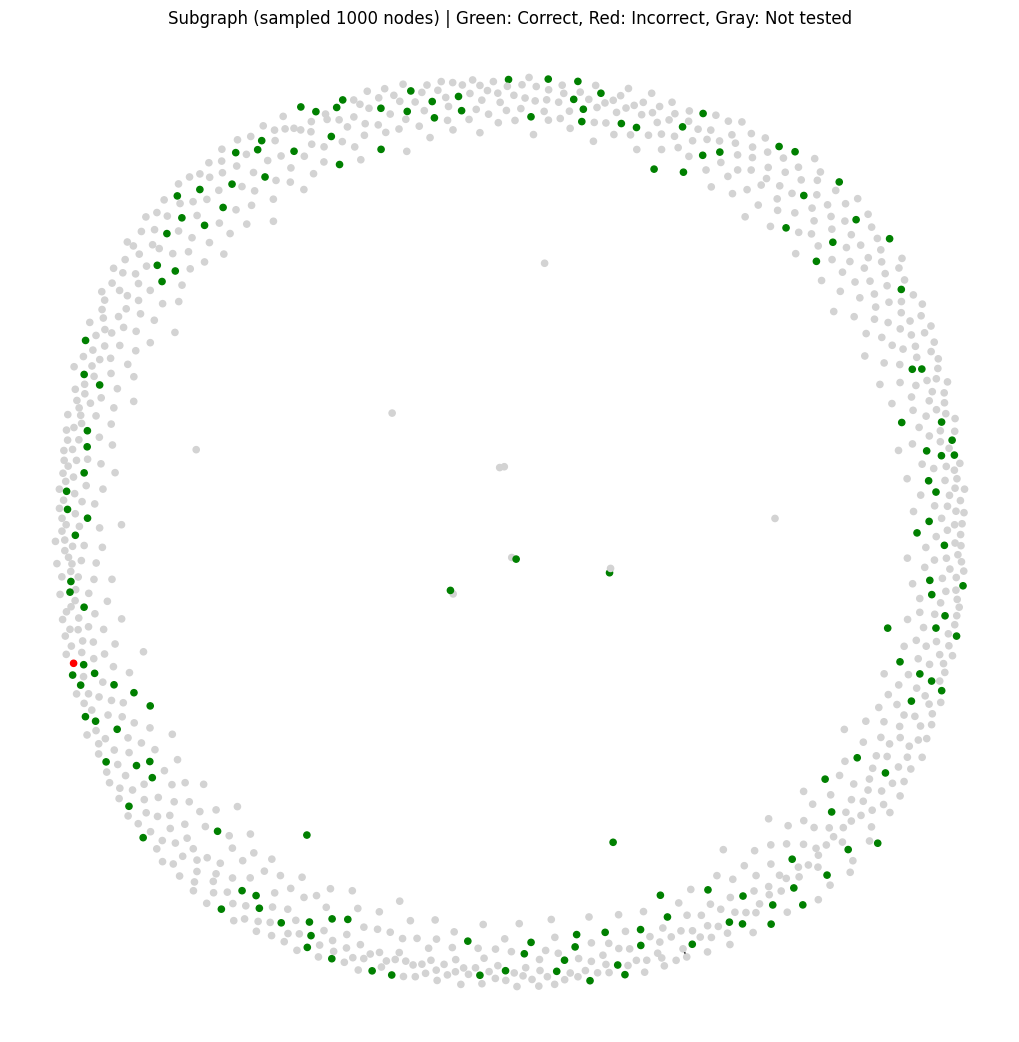

In [45]:
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils import to_networkx

# Convert graph to NetworkX (undirected for visualization)
G = to_networkx(data_graph, to_undirected=True)

# --- Sample Subgraph for Visualization ---
# Limit to, e.g., 1000 nodes to avoid lag
MAX_NODES = 1000
sample_nodes = torch.randperm(data_graph.num_nodes)[:MAX_NODES].tolist()
subgraph = G.subgraph(sample_nodes)

# Re-map predictions to original indices
pred_dict = dict(zip(test_indices.tolist(), pred.tolist()))

# Set color map
node_color = []
for node in subgraph.nodes():
    if node in pred_dict:
        if pred_dict[node] == data_graph.y[node].item():
            node_color.append('green')   # Correct prediction
        else:
            node_color.append('red')     # Incorrect prediction
    else:
        node_color.append('lightgray')   # Not in test set

# --- Draw ---
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(subgraph, seed=42)  # Faster and visually good layout
nx.draw(subgraph, pos, node_color=node_color, node_size=20, with_labels=False)
plt.title(f"Subgraph (sampled {MAX_NODES} nodes) | Green: Correct, Red: Incorrect, Gray: Not tested")
plt.show()
